In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os
for dirname, _, _ in os.walk('Dataset'):
        print(dirname)

In [ ]:
train_path = "DATASET/Train/"
test_path = "DATASET/Test/"

In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

In [ ]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 101/101 [00:00<00:00, 199.09it/s]


In [ ]:
data.shape

(2311, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'Train\\paper': 558,
         'Train\\glass': 465,
         'Train\\plastic': 446,
         'Train\\metal': 374,
         'Train\\cardboard': 367,
         'Train\\trash': 101})

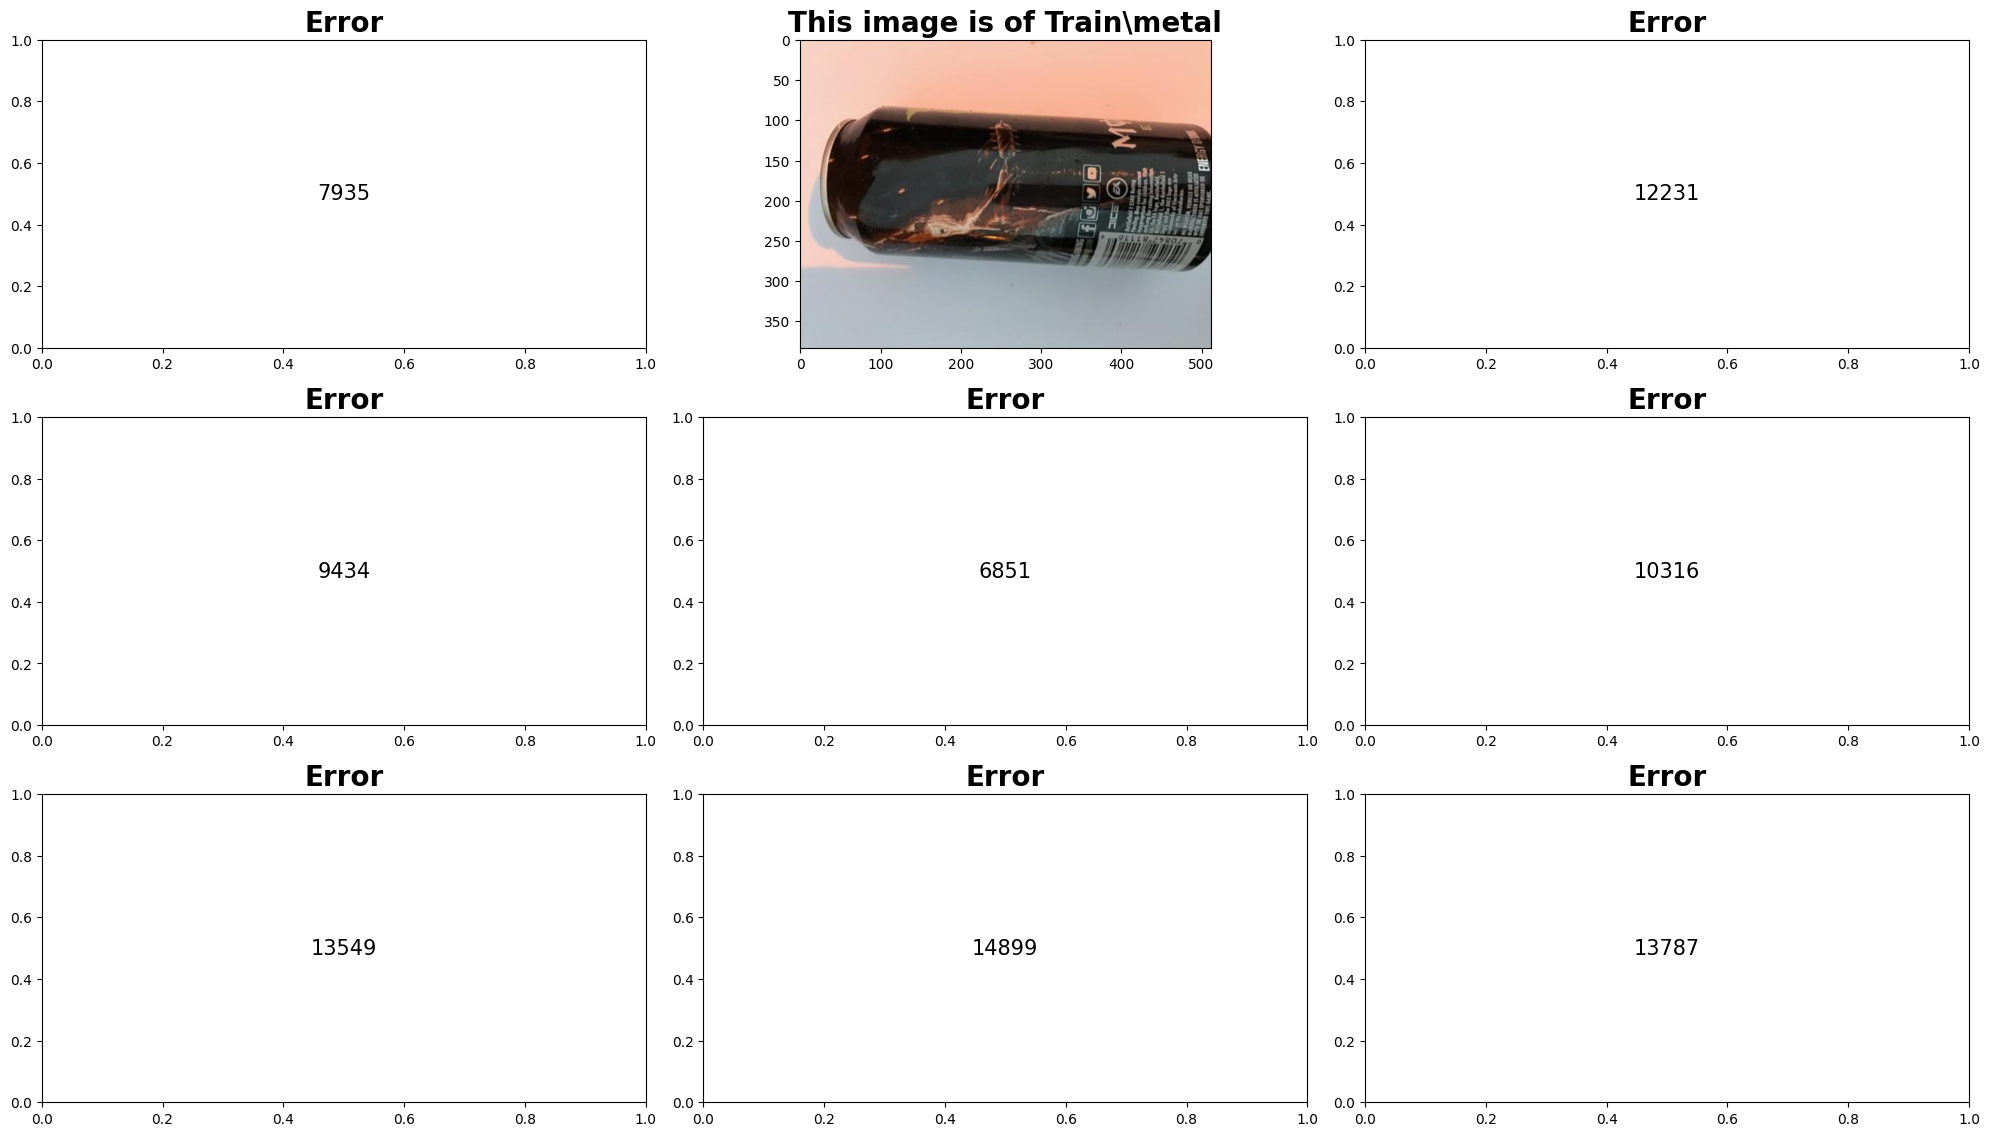

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i % 12) + 1)
    index = np.random.randint(0, 15000)  # Generate random index within valid range
    try:
        label = data.label[index]
        plt.title('This image is of {0}'.format(label), fontdict={'size': 20, 'weight': 'bold'})
        plt.imshow(data.image[index])
    except IndexError:
        plt.title('Index Error', fontdict={'size': 20, 'weight': 'bold'})
        plt.text(0.5, 0.5, 'Invalid Index', ha='center', va='center', fontsize=15)
    except Exception as e:
        plt.title('Error', fontdict={'size': 20, 'weight': 'bold'})
        plt.text(0.5, 0.5, str(e), ha='center', va='center', fontsize=15)
    
    plt.tight_layout()


In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  6


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [ ]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
batch_size=256

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 2311 images belonging to 6 classes.
Found 216 images belonging to 6 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=100 ,
        validation_data = test_generator)

C:\Users\zelih\AppData\Local\Temp\ipykernel_11020\1469775191.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/50
10/10 [==============================] - 301s 27s/step - loss: 0.6164 - accuracy: 0.2146 - val_loss: 0.4858 - val_accuracy: 0.1667
Epoch 2/50
10/10 [==============================] - 230s 22s/step - loss: 0.4951 - accuracy: 0.2224 - val_loss: 0.4517 - val_accuracy: 0.2824
Epoch 3/50
10/10 [==============================] - 238s 23s/step - loss: 0.4724 - accuracy: 0.2691 - val_loss: 0.4278 - val_accuracy: 0.2917
Epoch 4/50
10/10 [==============================] - 201s 19s/step - loss: 0.4544 - accuracy: 0.3090 - val_loss: 0.4146 - val_accuracy: 0.2917
Epoch 5/50
10/10 [==============================] - 194s 21s/step - loss: 0.4344 - accuracy: 0.3410 - val_loss: 0.4172 - val_accuracy: 0.3102
Epoch 6/50
10/10 [==============================] - 200s 19s/step - loss: 0.4272 - accuracy: 0.3509 - val_loss: 0.4017 - val_accuracy: 0.3287
Epoch 7/50
10/10 [==============================] - 197s 19s/step - loss: 0.4143 - accuracy: 0.3682 - val_loss: 0.3946 - val_accuracy: 0.2824
Epoch 

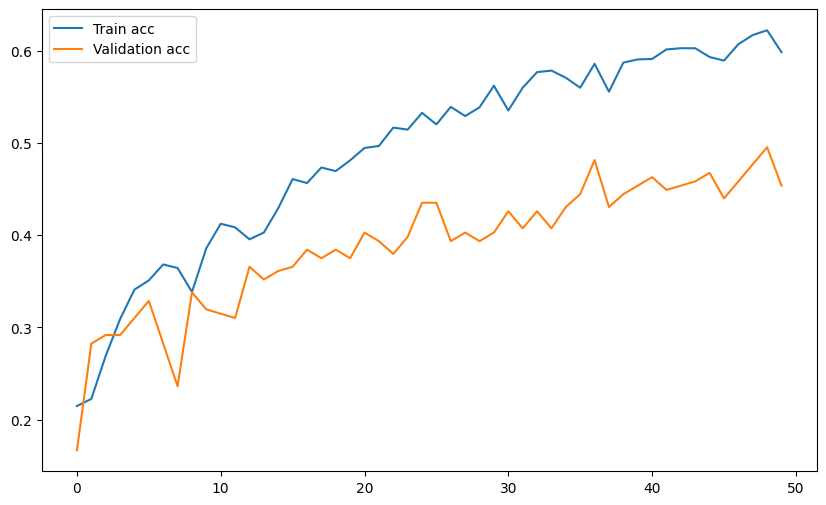

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

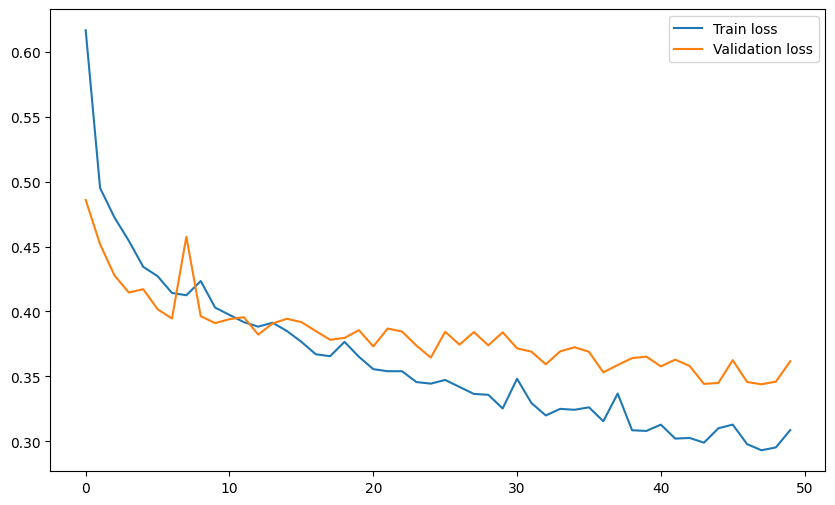

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 310ms/step


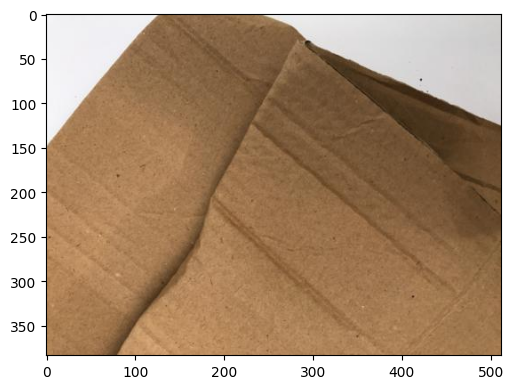

In [ ]:
test_img = cv2.imread("Dataset/Test/cardboard/cardboard31.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 62ms/step


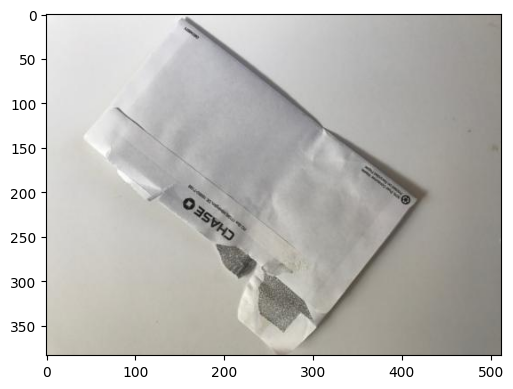

In [ ]:
test_img = cv2.imread("Dataset/Test/paper/paper177.jpg")
predict_func(test_img)